## 0. Install and Import Dependencies

In [1]:
#!pip install easyocr
#!pip install imutils
# !pip uninstall Pillow
# !pip install Pillow==9.5.0

In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

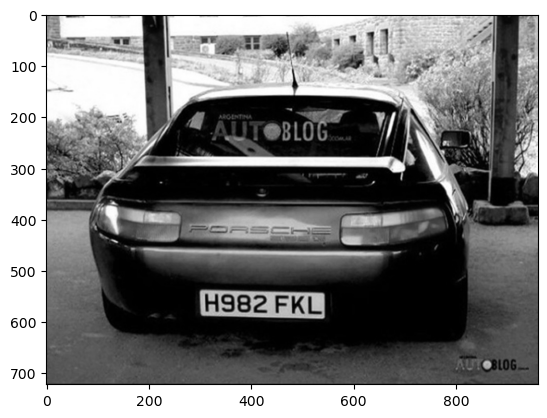

In [3]:
# read image
img = cv2.imread('image4.jpg')

# convert image into gray
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray_img, cv2.COLOR_BGR2RGB))

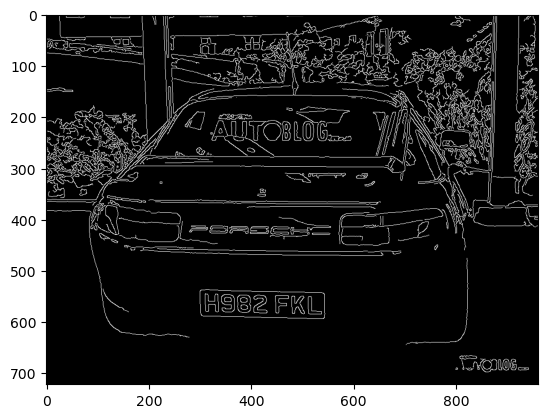

In [4]:
# Noise reduction
bfilter_img = cv2.bilateralFilter(gray_img, 11, 17, 17)
# plt.imshow(cv2.cvtColor(bfilter_img, cv2.COLOR_BGR2RGB))

# Edge detection
edged_img = cv2.Canny(bfilter_img, 30, 200) 

plt.imshow(cv2.cvtColor(edged_img, cv2.COLOR_BGR2RGB))

## 3. Find Contours and Apply Mask

In [5]:
keypoints = cv2.findContours(edged_img.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) # list of continuous points along the boundary
#                           (source image, contour retrieval mode, contour approximation method)

contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [6]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, epsilon=15, closed=True)  # epsilon specifying approximation accuracy
    # find polygon with 4 sides and stop
    if len(approx) == 4:
        location = approx
        break

In [7]:
location

array([[[300, 540]],

       [[306, 589]],

       [[543, 592]],

       [[538, 543]]], dtype=int32)

In [8]:
gray_img.shape

(722, 960)

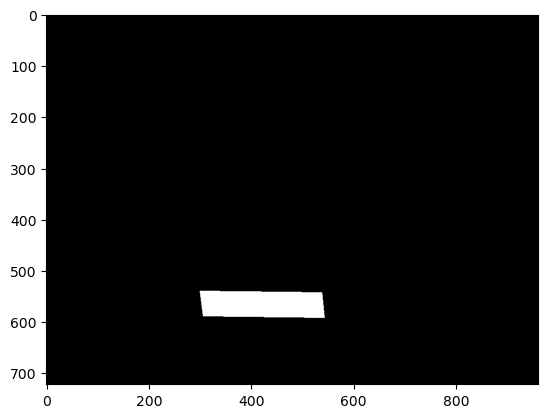

In [9]:
mask = np.zeros(gray_img.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0, 255, -1)
# new_image = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

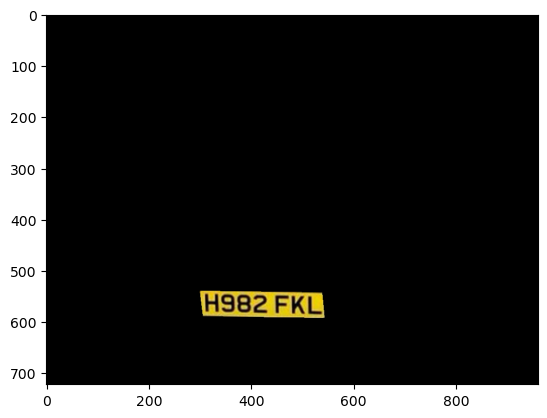

In [10]:
new_image = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [11]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray_img[x1:x2+1, y1:y2+1]

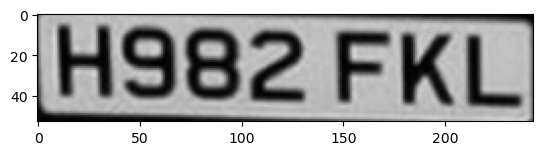

In [12]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

## 4. Use Easy OCR To Read Text

In [13]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[0, 0], [244, 0], [244, 53], [0, 53]], 'H982 FKL', 0.9769778047590311)]

## 5. Render Result

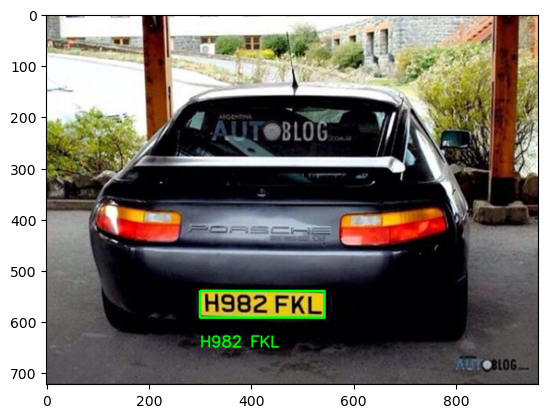

In [14]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))